In [ ]:
!ls # list the contents in the notebook


sample_data


# Hypothesis 1

In [ ]:
# install and set up the Spark environment
!clear
!echo welcome

!rm -f spark-3.3.[01]-bin-hadoop3.tgz* 
!rm -rf spark-3.3.[01]-bin-hadoop3

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz

welcome
--2023-05-23 12:10:55--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  24.8MB/s    in 12s     

2023-05-23 12:11:07 (23.3 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]



In [ ]:
!ls -alt

total 292368
drwxr-xr-x  1 root root      4096 May 23 12:11 .
drwxr-xr-x  1 root root      4096 May 23 12:08 ..
drwxr-xr-x  1 root root      4096 May 19 13:32 sample_data
drwxr-xr-x  4 root root      4096 May 19 13:31 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 1000      4096 Feb 10 20:40 spark-3.3.2-bin-hadoop3


In [ ]:
# install findspark and initialise 
!pip3 install findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
SparkSession.builder.getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# get file for given year from TfL open data
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-05-23 12:11:46--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.101.13, 104.16.100.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.101.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   174MB/s    in 1.2s    

2023-05-23 12:11:47 (174 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

In [ ]:
spark = SparkSession.builder.appName("bikes").getOrCreate()

In [ ]:
# read in file
!ls
file1="./3. Journey*csv"
file2="./4. Journey*csv"
file3="./5. Journey*csv"
file4="./6. Journey*csv"
total_spring_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file1,file2,file3,file4]))
total_spring_df.show(5)

'10a. Journey Data Extract 14Sep14-27Sep14.csv'
'10b. Journey Data Extract 28Sep14-11Oct14.csv'
'11a. Journey Data Extract 12Oct14-08Nov14.csv'
'11b. Journey Data Extract 12Oct14-08Nov14.csv'
'12a. Journey Data Extract 09Nov14-06Dec14.csv'
'12b. Journey Data Extract 09Nov14-06Dec14.csv'
'13a. Journey Data Extract 07Dec14-21Dec14.csv'
'13b. Journey Data Extract 22Dec14-03Jan15.csv'
'14. Journey Data Extract 08Dec13-04Jan14.csv'
'1. Journey Data Extract 05Jan14-02Feb14.csv'
'2. Journey Data Extract 03Feb14-01Mar14.csv'
'3. Journey Data Extract 02Mar14-31Mar14.csv'
'4. Journey Data Extract 01Apr14-26Apr14.csv'
'5. Journey Data Extract 27Apr14-24May14.csv'
'6. Journey Data Extract 25May14-21Jun14.csv'
'7. Journey Data Extract 22Jun14-19Jul14.csv'
'8a Journey Data Extract 20Jul14-31Jul14.csv'
'8b Journey Data Extract 01Aug14-16Aug14.csv'
'9a Journey Data Extract 17Aug14-31Aug14.csv'
'9b Journey Data Extract 01Sep14-13Sep14.csv'
 cyclehireusagestats-2014.zip
 sample_data
 spark-3.3.2-bin-had

In [ ]:
# filter the Start Date column by removing dates lower than 20/03/2014
start_df = total_spring_df.select(to_timestamp(col("Start Date"),format="dd/MM/yyyy HH:mm").alias("Start"),"Duration","StartStation Id","StartStation Name","End Date","EndStation Id","EndStation Name")

In [ ]:
spring_df = start_df.filter(start_df.Start >= "2014-03-20 00:00:00")

In [ ]:
end_df = spring_df.select(to_timestamp(col("End Date"),format="dd/MM/yyyy HH:mm").alias("End"),"Duration","Start","StartStation Id","StartStation Name","EndStation Id","EndStation Name")

In [ ]:
# filtering the end date of the dataframe by removing dates lower than 20/03/2014
spring_df = end_df.filter(end_df.End >= "2014-03-20 00:00:00")

In [ ]:
spring_df.show(5)# displays  5 rows of the dataframe

+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|                End|Duration|              Start|StartStation Id|   StartStation Name|EndStation Id|     EndStation Name|
+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|2014-05-27 00:59:00|    1140|2014-05-27 00:40:00|             81|Great Titchfield ...|          695|Islington Green, ...|
|2014-05-30 18:00:00|     660|2014-05-30 17:49:00|            203|West Smithfield R...|          326|Graham Street, Angel|
|2014-06-03 13:29:00|    1440|2014-06-03 13:05:00|            239|Warren Street Sta...|          695|Islington Green, ...|
|2014-06-09 18:31:00|     960|2014-06-09 18:15:00|            695|Islington Green, ...|           20|Drummond Street ,...|
|2014-06-11 19:58:00|    1260|2014-06-11 19:37:00|            311|Foley Street, Fit...|          697|Charlotte Terrace...|
+---------------

In [ ]:
spring_df.count() # displays the number of rows present in the dataframe

2691350

##### The aggregate function, agg() is used to show the summary statistics of the duration of rides like mean, minimum duration, maximum duration, skewness of distribution and the total duration (sum).

In [ ]:
mean = spring_df.agg({"Duration":"mean"}).show() 

+------------------+
|     avg(Duration)|
+------------------+
|1522.0841287829528|
+------------------+



In [ ]:
min = spring_df.agg({"Duration":"min"}).show()

+-------------+
|min(Duration)|
+-------------+
|            0|
+-------------+



In [ ]:
max = spring_df.agg({"Duration":"max"}).show()

+-------------+
|max(Duration)|
+-------------+
|        99900|
+-------------+



In [ ]:
skewness = spring_df.agg({"Duration":"skewness"}).show()

+------------------+
|skewness(Duration)|
+------------------+
| 82.81257302398738|
+------------------+



In [ ]:
sum = spring_df.agg({"Duration":"sum"}).show()

+-------------+
|sum(Duration)|
+-------------+
| 4.09646112E9|
+-------------+



In [ ]:
spring_df.agg({"Duration":"Sum"}).show() # displays the total duration of rides in the Spring season

+-------------+
|sum(Duration)|
+-------------+
| 4.09646112E9|
+-------------+



#### The dataframe spring_df is grouped using the function groupBy() on the basis of startstation name and the corresponding aggregate duration. It is displayed by ordering in the descending order of duration. orderBy() and sort() is used to sort the values.

In [ ]:
spring_df.groupBy("StartStation Name").agg({"Duration":"mean"}).orderBy("avg(Duration)",ascending=False).show(10)
spring_df.groupBy("StartStation Name").agg({"Duration":"min"}).sort("min(Duration)").show(10)
spring_df.groupBy("StartStation Name").agg({"Duration":"max"}).sort("max(Duration)",ascending=False).show(10)
spring_df.groupBy("StartStation Name").agg({"Duration":"skewness"}).show(10)
spring_df.groupBy("StartStation Name").agg({"Duration":"sum"}).orderBy("sum(Duration)",ascending=False).show(10)



+--------------------+------------------+
|   StartStation Name|     avg(Duration)|
+--------------------+------------------+
|Bromley High Stre...| 5258.209459459459|
|Teviot Street, Po...| 4790.930232558139|
|Malmesbury Road, Bow| 4771.397260273972|
|St John's Park, C...| 4193.008849557522|
|Ravenscourt Park ...| 3839.508532423208|
|Hurlingham Park, ...|3708.3168316831684|
|Peterborough Road...|3678.3571428571427|
|Stebondale Street...| 3673.457943925234|
|Thessaly Road Nor...|3636.8267223382045|
|Putney Bridge Roa...|3592.0114942528735|
+--------------------+------------------+
only showing top 10 rows

+--------------------+-------------+
|   StartStation Name|min(Duration)|
+--------------------+-------------+
|Abbey Orchard Str...|            0|
|Abbotsbury Road, ...|            0|
|Aberdeen Place, S...|            0|
|Aberfeldy Street,...|            0|
|Abingdon Green, G...|            0|
|Abingdon Villas, ...|            0|
|  Ackroyd Drive, Bow|            0|
|Ada Street, Hac

In [ ]:
spring_df.filter("Duration = 0").count() # gives the number of rows where the duration column is zero 

8336

In [ ]:
hour_df = spring_df.select("StartStation Name","StartStation Id","EndStation Id","EndStation Name",((col("Duration")/3600).alias('hours'))) # the duration in seconds is converted to hours 

In [ ]:
hour_df.groupBy("StartStation Name").sum("hours").orderBy("sum(hours)",ascending=False).show(10)

+--------------------+------------------+
|   StartStation Name|        sum(hours)|
+--------------------+------------------+
|Hyde Park Corner,...|21730.850000000006|
|Black Lion Gate, ...|17798.733333333297|
|Speakers' Corner ...|15059.149999999974|
|Albert Gate, Hyde...|11855.683333333316|
|Palace Gate, Kens...| 9562.083333333321|
|Wellington Arch, ...| 8830.750000000002|
|Speakers' Corner ...|8189.5333333333465|
|Triangle Car Park...| 7710.250000000002|
|Cumberland Gate, ...| 7187.950000000005|
|Regent's Row , Ha...| 6821.950000000012|
+--------------------+------------------+
only showing top 10 rows



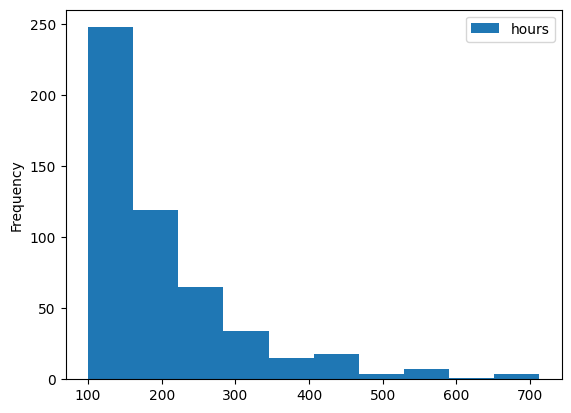

In [ ]:
import matplotlib.pyplot as plt   # import the libraries for plotting graph
import pandas as pd               # import pandas library
pd_df = hour_df.filter("hours>100")[["hours"]].toPandas() # the hours column is converted to Pandas dataframe 
pd_df.plot(kind="hist")   # histogram is plotted 
plt.show()

In [ ]:
hour_df.show(5)

+--------------------+---------------+-------------+--------------------+-------------------+
|   StartStation Name|StartStation Id|EndStation Id|     EndStation Name|              hours|
+--------------------+---------------+-------------+--------------------+-------------------+
|Great Titchfield ...|             81|          695|Islington Green, ...|0.31666666666666665|
|West Smithfield R...|            203|          326|Graham Street, Angel|0.18333333333333332|
|Warren Street Sta...|            239|          695|Islington Green, ...|                0.4|
|Islington Green, ...|            695|           20|Drummond Street ,...|0.26666666666666666|
|Foley Street, Fit...|            311|          697|Charlotte Terrace...|               0.35|
+--------------------+---------------+-------------+--------------------+-------------------+
only showing top 5 rows



In [ ]:
hour_df.groupBy("StartStation Name").agg({"hours":"mean"}).orderBy("avg(hours)",ascending=False).show(10)
hour_df.groupBy("StartStation Name").agg({"hours":"min"}).sort("min(hours)").show(10)
hour_df.groupBy("StartStation Name").agg({"hours":"max"}).sort("max(hours)",ascending=False).show(10)
hour_df.groupBy("StartStation Name").agg({"hours":"skewness"}).show(10)
hour_df.groupBy("StartStation Name").agg({"hours":"sum"}).orderBy("sum(hours)",ascending=False).show(10)



+--------------------+------------------+
|   StartStation Name|        avg(hours)|
+--------------------+------------------+
|Bromley High Stre...|1.4606137387387381|
|Teviot Street, Po...|1.3308139534883718|
|Malmesbury Road, Bow|1.3253881278538817|
|St John's Park, C...|1.1647246804326448|
|Ravenscourt Park ...| 1.066530147895335|
|Hurlingham Park, ...|1.0300880088008797|
|Peterborough Road...| 1.021765873015873|
|Stebondale Street...|1.0204049844236756|
|Thessaly Road Nor...|1.0102296450939456|
|Putney Bridge Roa...|0.9977809706257985|
+--------------------+------------------+
only showing top 10 rows

+--------------------+----------+
|   StartStation Name|min(hours)|
+--------------------+----------+
|George Place Mews...|       0.0|
|Dunston Road , Ha...|       0.0|
|Panton Street, We...|       0.0|
|Russell Gardens, ...|       0.0|
|Portland Place, M...|       0.0|
|  Park Lane, Mayfair|       0.0|
|Montgomery Square...|       0.0|
|Appold Street, Li...|       0.0|
|Kingsway So

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

<Axes: ylabel='Frequency'>

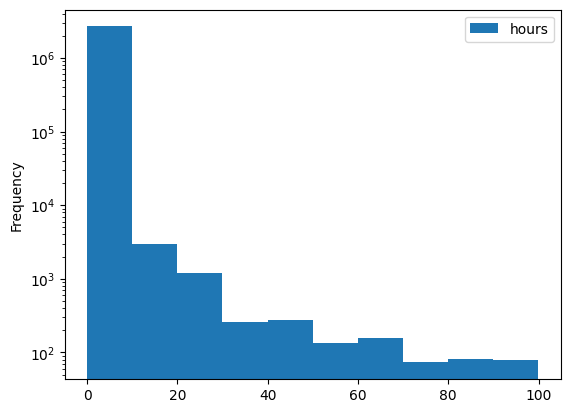

In [ ]:
hour_df.filter("hours>0").filter("hours <= 100")[["hours"]].toPandas().plot(kind="hist",bins=10,log=True)

In [ ]:
# read in file
# for the autumn weather, we can take the following files
file1="./10a. Journey*csv"
file2="./10b. Journey*csv"
file3="./11a. Journey*csv"
file4="./11b. Journey*csv"
file5="./12a. Journey*csv"
file6="./13a. Journey*csv"
total_autumn_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file1,file2,file3,file4,file5,file6]))
total_autumn_df.show(5)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 37875851|     120|   3229|28/09/2014 00:02|          450|Jubilee Street, S...|28/09/2014 00:00|            443|Philpot Street, W...|null|null|null|
| 37875861|    1080|   3283|28/09/2014 00:18|          645|Great Suffolk Str...|28/09/2014 00:00|             14|Belgrove Street ,...|null|null|null|
| 37875857|    2820|  11369|28/09/2014 00:47|          727|Chesilton Road, F...|28/09/2014 00:00|            321|Bermondsey Street...|null|null|null|
| 37875849|    1620|  11362|28/09/2014 00:27|          719|Victoria Park Roa...|28/09/2014 00:00|   

In [ ]:
# remove the unwanted columns and choose start date and end date greater than september 22, 2014
start_df = total_autumn_df.select(to_timestamp(col("Start Date"),format="dd/MM/yyyy HH:mm").alias("Start"),"Duration","StartStation Id","StartStation Name","End Date","EndStation Id","EndStation Name")

In [ ]:
autumn_df = start_df.filter(start_df.Start >= "2014-09-22 00:00:00")

In [ ]:
end_df = autumn_df.select(to_timestamp(col("End Date"),format="dd/MM/yyyy HH:mm").alias("End"),"Duration","Start","StartStation Id","StartStation Name","EndStation Id","EndStation Name")

In [ ]:
autumn_df = end_df.filter(end_df.Start >= "2014-09-22 00:00:00")

In [ ]:
autumn_df.show(5)

+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|                End|Duration|              Start|StartStation Id|   StartStation Name|EndStation Id|     EndStation Name|
+-------------------+--------+-------------------+---------------+--------------------+-------------+--------------------+
|2014-09-28 00:02:00|     120|2014-09-28 00:00:00|            443|Philpot Street, W...|          450|Jubilee Street, S...|
|2014-09-28 00:18:00|    1080|2014-09-28 00:00:00|             14|Belgrove Street ,...|          645|Great Suffolk Str...|
|2014-09-28 00:47:00|    2820|2014-09-28 00:00:00|            321|Bermondsey Street...|          727|Chesilton Road, F...|
|2014-09-28 00:27:00|    1620|2014-09-28 00:00:00|            773|Tallis Street, Te...|          719|Victoria Park Roa...|
|2014-09-28 00:08:00|     480|2014-09-28 00:00:00|            717|Dunston Road , Ha...|          553|Regent's Row , Ha...|
+---------------

In [ ]:
autumn_df.count() # the number of rows in the dataframe

2039094

In [ ]:
mean = autumn_df.agg({"Duration":"mean"}).show() # mean of the duration of rides for Autumn season

+------------------+
|     avg(Duration)|
+------------------+
|1328.2720266942083|
+------------------+



In [ ]:
mean = spring_df.agg({"Duration":"mean"}).show() # average duration of rides for Spring season. The value is higher than average duration of rides in autumn

+------------------+
|     avg(Duration)|
+------------------+
|1522.0841287829528|
+------------------+



In [ ]:
max = spring_df.agg({"Duration":"max"}).show() # maximum value of duration of rides

+-------------+
|max(Duration)|
+-------------+
|        99900|
+-------------+



In [ ]:
max = autumn_df.agg({"Duration":"max"}).show()

+-------------+
|max(Duration)|
+-------------+
|        99900|
+-------------+



In [ ]:
sum = spring_df.agg({"Duration":"sum"}).show() # total duration of rides in the Spring

+-------------+
|sum(Duration)|
+-------------+
| 4.09646112E9|
+-------------+



In [ ]:
sum = autumn_df.agg({"Duration":"sum"}).show() # total duration of rides in the Autumn season

+-------------+
|sum(Duration)|
+-------------+
| 2.70847152E9|
+-------------+



In [ ]:
autumn_df.groupBy("StartStation Name").agg({"Duration":"mean"}).orderBy("avg(Duration)",ascending=False).show(10)
autumn_df.groupBy("StartStation Name").agg({"Duration":"min"}).sort("min(Duration)").show(10)
autumn_df.groupBy("StartStation Name").agg({"Duration":"max"}).sort("max(Duration)",ascending=False).show(10)
autumn_df.groupBy("StartStation Name").agg({"Duration":"skewness"}).show(10)
autumn_df.groupBy("StartStation Name").agg({"Duration":"sum"}).orderBy("sum(Duration)",ascending=False).show(10)



+--------------------+------------------+
|   StartStation Name|     avg(Duration)|
+--------------------+------------------+
|South Quay East, ...| 16258.41059602649|
|Mechanical Worksh...|           15120.0|
|Thornfield House,...|10801.132075471698|
|  Cantrell Road, Bow| 6467.900826446281|
|Preston's Road, C...|4007.0953436807094|
|Bromley High Stre...| 3866.657824933687|
|Putney Rail Stati...|3831.3086913086913|
|Cadogan Close, Vi...| 3802.645411460577|
|St. John's Road, ...| 3742.847124824684|
|East Ferry Road, ...| 3606.760563380282|
+--------------------+------------------+
only showing top 10 rows

+--------------------+-------------+
|   StartStation Name|min(Duration)|
+--------------------+-------------+
|Gaywood  Street, ...|        -1020|
|Park Road (Baker ...|        -1020|
|Erin Close, Walha...|        -1140|
|    City Road, Angel|        -1140|
|Old Street Statio...|        -1140|
|Warwick Avenue St...|         -120|
|Charles II Street...|         -120|
|Felsham Road, P

In [ ]:
hour_autumn_df = autumn_df.select("StartStation Name","StartStation Id","EndStation Id","EndStation Name",((col("Duration")/3600).alias('hours')))

In [ ]:
hour_autumn_df.groupBy("StartStation Name").sum("hours").orderBy("sum(hours)",ascending=False).show(10) # duration in seconds converted to hours and created the dataframe, then the total duration of rides for each startstation name is grouped and ordered in descending order.

+--------------------+------------------+
|   StartStation Name|        sum(hours)|
+--------------------+------------------+
|Hyde Park Corner,...| 11685.94999999999|
|Black Lion Gate, ...|  7835.53333333334|
|Albert Gate, Hyde...| 6831.433333333331|
|Speakers' Corner ...| 5360.283333333349|
|Belgrove Street ,...| 4923.333333333366|
|Wellington Arch, ...| 4516.950000000003|
|Speakers' Corner ...| 4352.200000000003|
|Waterloo Station ...|4126.2000000000435|
|Shoreditch High S...|3795.4166666666715|
|Triangle Car Park...| 3759.550000000002|
+--------------------+------------------+
only showing top 10 rows



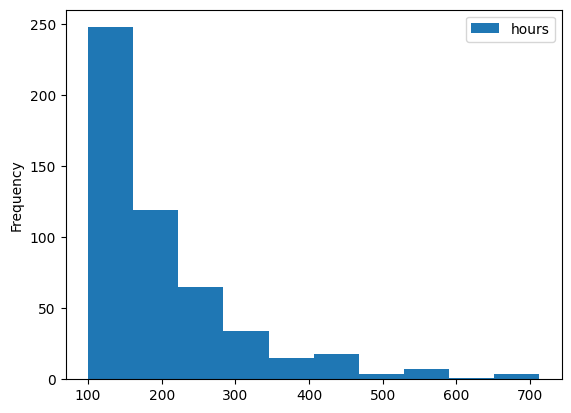

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd_df = hour_autumn_df.filter("hours>100")[["hours"]].toPandas()
pd_df.plot(kind="hist",bins=10)
plt.show()

In [ ]:
hour_autumn_df.groupBy("StartStation Name").agg({"hours":"sum"}).orderBy("sum(hours)",ascending=False).show(10)
# the sum of duration for autumn; showing the top 10

+--------------------+------------------+
|   StartStation Name|        sum(hours)|
+--------------------+------------------+
|Hyde Park Corner,...| 11685.94999999999|
|Black Lion Gate, ...|  7835.53333333334|
|Albert Gate, Hyde...| 6831.433333333331|
|Speakers' Corner ...| 5360.283333333349|
|Belgrove Street ,...| 4923.333333333366|
|Wellington Arch, ...| 4516.950000000003|
|Speakers' Corner ...| 4352.200000000003|
|Waterloo Station ...|4126.2000000000435|
|Shoreditch High S...|3795.4166666666715|
|Triangle Car Park...| 3759.550000000002|
+--------------------+------------------+
only showing top 10 rows



In [ ]:
hour_df.groupBy("StartStation Name").agg({"hours":"sum"}).orderBy("sum(hours)",ascending=False).show(10)
# the sum of duration of rides for spring; the top 10 is shown

+--------------------+------------------+
|   StartStation Name|        sum(hours)|
+--------------------+------------------+
|Hyde Park Corner,...|21730.850000000006|
|Black Lion Gate, ...|17798.733333333297|
|Speakers' Corner ...|15059.149999999974|
|Albert Gate, Hyde...|11855.683333333316|
|Palace Gate, Kens...| 9562.083333333321|
|Wellington Arch, ...| 8830.750000000002|
|Speakers' Corner ...|8189.5333333333465|
|Triangle Car Park...| 7710.250000000002|
|Cumberland Gate, ...| 7187.950000000005|
|Regent's Row , Ha...| 6821.950000000012|
+--------------------+------------------+
only showing top 10 rows



<Axes: ylabel='Frequency'>

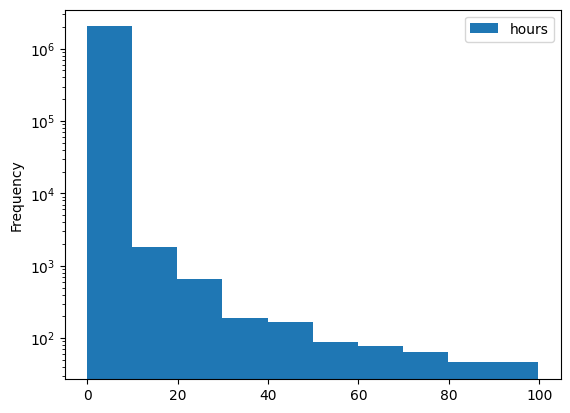

In [ ]:
hour_autumn_df.filter("hours>0").filter("hours <= 100")[["hours"]].toPandas().plot(kind="hist",bins=10,log=True) # histogram plot for the hours by converting it to pandas dataframe and taking the logarithmic value